<a href="https://colab.research.google.com/github/dapooni/spam_ham_comparison/blob/main/model_training%2C_evaluation%2C_and_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM OR HAM SMS CLASSIFICATION USING MACHINE LEARNING TECHNIQUES (RANDOM FOREST, NAIVE BAYES, AND SUPPORT VECTOR MACHINES)**

In [ ]:
#insert global variables/libraries here

In [ ]:
import pandas as pd
import string

In [ ]:
file_url = 'https://drive.google.com/uc?id=18uYKIudacEckmE52p3rJYrndf6ON9mrj'
df = pd.read_csv(file_url)

In [ ]:
#handle missing values
df["message"].fillna('', inplace=True)

#remove punctuations
for i in range(len(df)):
  df["message"][i] = df["message"][i].translate(str.maketrans('', '', string.punctuation))

## **[ MODEL TRAINING ]**

### **`Random Forest`**

In [ ]:
from sklearn.model_selection import train_test_split as tt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#split dataset
X = df['message']
Y = df['label']
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.2, random_state=100)

In [ ]:
vectorizer = TfidfVectorizer()#max_features=5000
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
#transform the data with the vector for model training and testing
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
#training the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_transformed, Y_train)

RandomForestClassifier(random_state=42)

### **`Random Forest Model Evaluation`**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
#predict the y of the x_test
y_pred = rf_classifier.predict(X_test_transformed)
y_pred_prob = rf_classifier.predict_proba(X_test_transformed)

In [ ]:
#print sample of the X_test with the Y_test and y_pred
combined_df = pd.DataFrame({'X_test': X_test, 'Y_test': Y_test, 'y_pred': y_pred})
random_sample = combined_df.sample(n=40, random_state=42)
print(random_sample)

                                                  X_test  Y_test  y_pred
9813   rm0 nb plaza 11th anniversary fair 5th 7th jan...       1       1
2553                          super msg da nalla timing.       0       0
4782   win 4 costa del sol holiday 5000 await collect...       1       1
5762   join win team now instant airtime answer 3 sim...       1       1
8300   txn id recharge 45 ngn 7087214890 successful. ...       0       0
11212  dear user netbanking block bitly.ws immediatel...       1       1
9736   important message nt health register territory...       1       1
4670   hello boytoy geeee ... i'm miss today. like tm...       0       0
4654                                           talk me..       0       0
12467             pay pal online disable see a711sec.com       1       1
7868   use otp code complete transaction. otp code ex...       0       0
1031                                     ard like dat. y       0       0
1301   chill another 6hrs. could sleep pain emergen

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1404
           1       0.93      0.90      0.92      1379

    accuracy                           0.92      2783
   macro avg       0.92      0.92      0.92      2783
weighted avg       0.92      0.92      0.92      2783



In [ ]:
#ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9704772338021069


In [ ]:
#Find the FPR. Threshold and TPR for the data.
df = pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })
df.head()

,Threshold,TPR,FPR
0,2.0000,0.000000,0.0
1,1.0000,0.160986,0.0
2,0.9926,0.163887,0.0
3,0.9900,0.228426,0.0
4,0.9830,0.230602,0.0


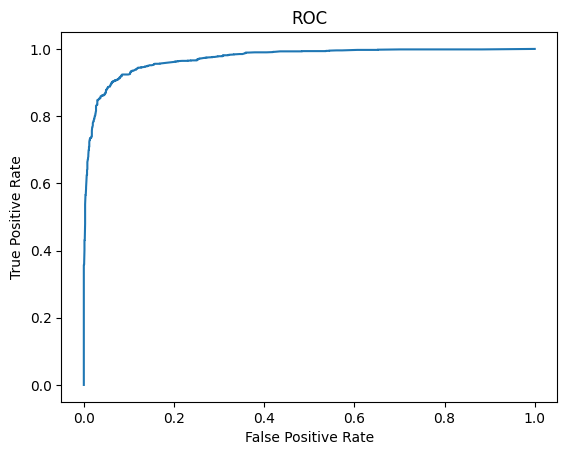

In [ ]:
#Plot the ROC curve of the dataset.
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1317   87]
 [ 138 1241]]


### **`Naive Bayes`**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# split dataset
X_naive = df['message']
Y_naive = df['label']
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_naive,
                                                    Y_naive,
                                                    test_size=0.2,
                                                    random_state=100)

In [ ]:
# vectorize the messages
count_vector = CountVectorizer()
training_data_naive = count_vector.fit_transform(X_train_naive)
testing_data_naive = count_vector.transform(X_test_naive)

In [ ]:
# train Naive Baye classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data_naive,y_train_naive)

MultinomialNB()

### **`Naive Bayes Model Evaluation`**

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [ ]:
# predict the y of the testing_data
y_pred_naive = naive_bayes.predict(testing_data_naive)

In [ ]:
X_train_naive

726      haha mayb ure rite know well da feel like some...
12106    message wed x nov 3 36 pm really need donate b...
13120    hey thank check neighbor storage need join wai...
3132                                    oh maybe ill dl 3d
8674     thrill callers amaze cool fm s world cup theme...
                               ...                        
79                     here still look job much earn there
12119    lloyds successfully pair new device recognise ...
8039                                 conference room later
6936                                                      
5640                                                      
Name: message, Length: 11129, dtype: object

In [ ]:
combine_df_naive = pd.DataFrame({'Message': X_test_naive, 'True Label': y_test_naive, 'Predicted Label': y_pred_naive})
random_sample_naive = combine_df_naive.sample(n=40, random_state=42)
print(random_sample_naive)

                                                 Message  True Label  \
9813   rm0 nb plaza 11th anniversary fair 5th 7th jan...           1   
2553                           super msg da nalla timing           0   
4782   win 4 costa del sol holiday 5000 await collect...           1   
5762   join win team now instant airtime answer 3 sim...           1   
8300   txn id recharge 45 ngn 7087214890 successful n...           0   
11212  dear user netbanking block bitlyws immediately...           1   
9736   important message nt health register territory...           1   
4670   hello boytoy geeee  im miss today like tm remi...           0   
4654                                             talk me           0   
12467              pay pal online disable see a711seccom           1   
7868   use otp code complete transaction otp code exp...           0   
1031                                      ard like dat y           0   
1301   chill another 6hrs could sleep pain emergency ...        

In [ ]:
# print/generate classification report
report = classification_report(y_test_naive, y_pred_naive)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1404
           1       0.88      0.91      0.90      1379

    accuracy                           0.90      2783
   macro avg       0.90      0.90      0.90      2783
weighted avg       0.90      0.90      0.90      2783



In [ ]:
# Threshold, TPR, FPR
fpr_naive, tpr_naive, thresholds_naive = roc_curve(y_test_naive, y_prob_naive)
df_naive = pd.DataFrame({'Threshold': thresholds_naive,
              'TPR': tpr_naive,
              'FPR':fpr_naive
             })
df_naive.head()

,Threshold,TPR,FPR
0,2.0,0.000000,0.0
1,1.0,0.079043,0.0
2,1.0,0.081943,0.0
3,1.0,0.082669,0.0
4,1.0,0.092821,0.0


In [ ]:
# ROC Curve
y_prob_naive = naive_bayes.predict_proba(testing_data_naive)[:, 1]
roc_auc_naive = auc(fpr_naive, tpr_naive)
print(roc_auc_naive)

0.9633999202527123


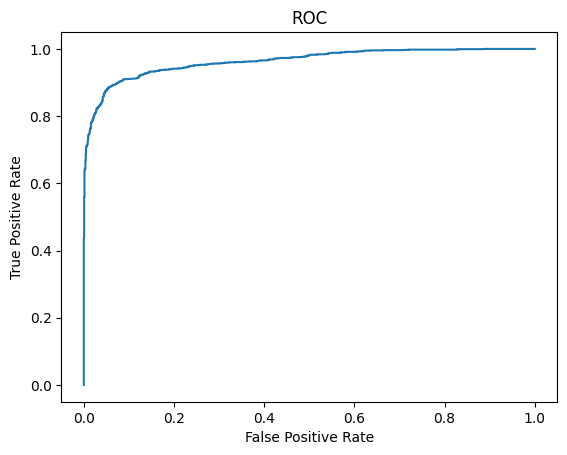

In [ ]:
#Plot the ROC curve of the dataset.
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr_naive, tpr_naive)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_naive, y_pred_naive)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1239  165]
 [ 121 1258]]


### **`Support Vector Machine`**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Split data into features and labels
x = df['message']
y = df['label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [ ]:
# Train the SVM model
svm_model = SVC()  # You can experiment with different kernels and hyperparameters {'sigmoid', 'linear', 'poly', 'rbf', 'precomputed'}
svm_model.fit(x_train_tfidf, y_train)

SVC()

### **`Support Vector Machine Evaluation`**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# Predictions
y_pred = svm_model.predict(x_test_tfidf)

In [ ]:
#print sample of the x_test with the y_test and y_pred
combined_df = pd.DataFrame({'X_test': x_test, 'y_test': y_test, 'y_pred': y_pred})
random_sample = combined_df.sample(n=40, random_state=42)
print(random_sample)

                                                  X_test  y_test  y_pred
11068  simon attempt deliver parcel one answer resche...       1       1
1801                                              ok say       0       0
7760                man first duty bring worse ignorance       1       0
9573   dear user yono block todayplease pan number thank       1       1
7884                              gtbank abiola tolulope       0       0
2501                                   hon lab one there       0       0
11851                    block pancard thank b i pls ltd       1       0
3755                                   kkwhen give treat       0       0
9082            want domain help check availability cash       0       0
4336                                   plan come chennai       0       0
10239  dear hdfc bank kyc expire block 24hrs kyc cutt...       1       1
1684                      calm cos know r doin up4 j xxx       0       0
10580  accessible simple step apply https pynowin c

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9270571325907294
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1430
           1       0.95      0.90      0.92      1353

    accuracy                           0.93      2783
   macro avg       0.93      0.93      0.93      2783
weighted avg       0.93      0.93      0.93      2783



In [ ]:
roc_auc = roc_auc_score(y_test, svm_model.decision_function(x_test_tfidf))
print(roc_auc)

0.9757144186190748


In [ ]:
# Threshold, TPR, FPR
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(x_test_tfidf))
df_naive = pd.DataFrame({'Threshold': thresholds,
              'TPR': tpr,
              'FPR':fpr
             })
df_naive.head()

,Threshold,TPR,FPR
0,3.754833,0.000000,0.0
1,2.754833,0.001478,0.0
2,2.510023,0.003695,0.0
3,2.153706,0.019956,0.0
4,2.153080,0.021434,0.0


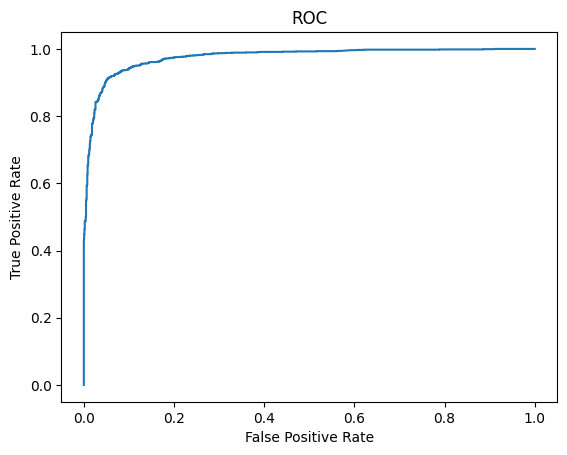

In [ ]:
#Plot the ROC curve of the dataset.
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr, tpr)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1361   69]
 [ 134 1219]]


Text(0.5, 1.0, 'Confussion Matrix')

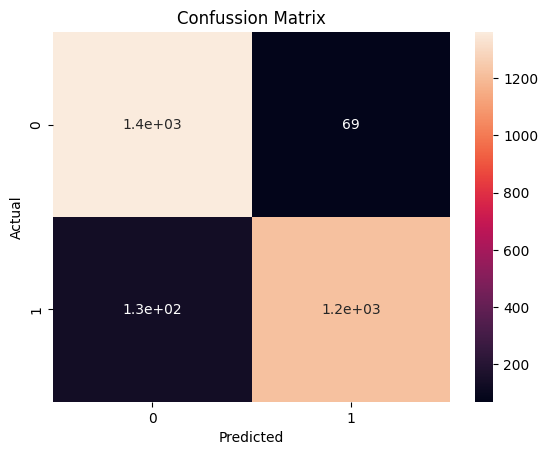

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## **[ MODEL COMPARISON ]**

Accuracy | Precision | Recall

In [ ]:
#Shows the accuracy, precision, and recall of each model algorithm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
algorithms = ['SVM', 'Naive Bayes', 'Random Forest']
accuracy = [0.927, 0.90, 0.92]
precision = [0.93, 0.895, 0.92]
recall = [0.925, 0.895, 0.92]

In [ ]:
x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars

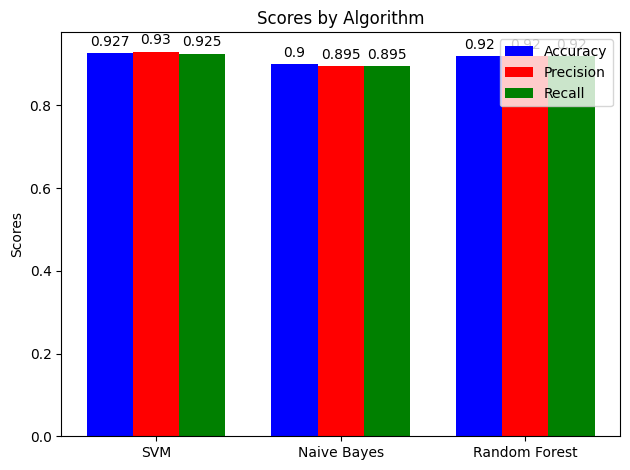

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
rects2 = ax.bar(x, precision, width, label='Precision', color='red')
rects3 = ax.bar(x + width, recall, width, label='Recall', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

F1 Score

In [ ]:
#This Shows the F1 score of each model algorithm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
algorithms = ['SVM', 'Naive Bayes', 'Random Forest']
precision = [0.93, 0.895, 0.92]
recall = [0.925, 0.895, 0.92]

# Calculate F1 scores
f1_scores = [(2 * p * r) / (p + r) for p, r in zip(precision, recall)]

x = np.arange(len(algorithms))  # the label locations
width = 0.5  # the width of the bars

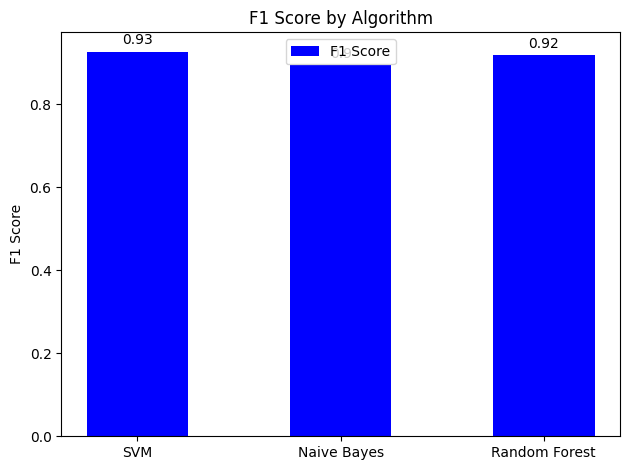

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x, f1_scores, width, label='F1 Score', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()


ROC-AUC Score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
algorithms = ['SVM', 'Naive Bayes', 'Random Forest']
roc_auc_scores = [0.975, 0.963, 0.97]

x = np.arange(len(algorithms))  # the label locations
width = 0.5  # the width of the bars

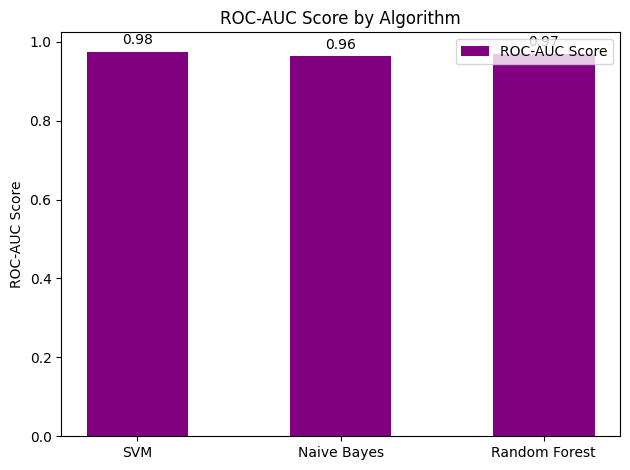

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x, roc_auc_scores, width, label='ROC-AUC Score', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC-AUC Score')
ax.set_title('ROC-AUC Score by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Define the confusion matrices
svm_confusion_matrix = [[1361, 69], [134, 1219]]
rf_confusion_matrix = [[1317, 87], [138, 1241]]
nb_confusion_matrix = [[1239, 165], [121, 1258]]


In [ ]:
# Plot confusion matrix function
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

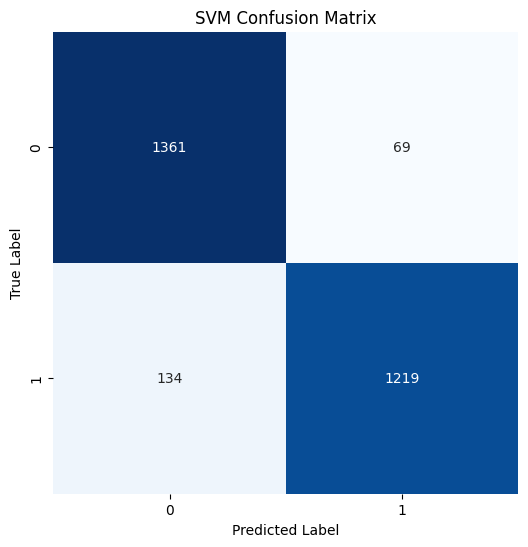

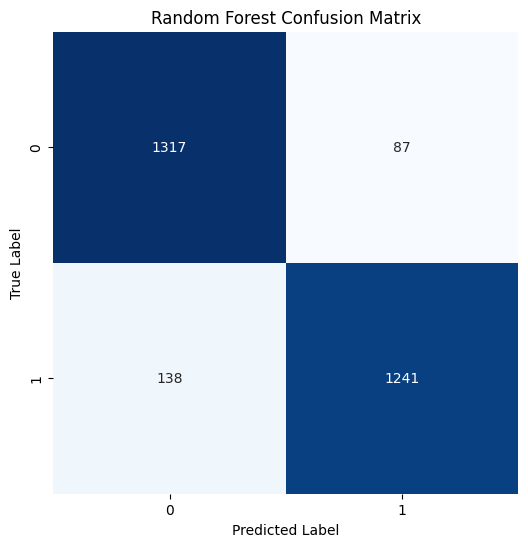

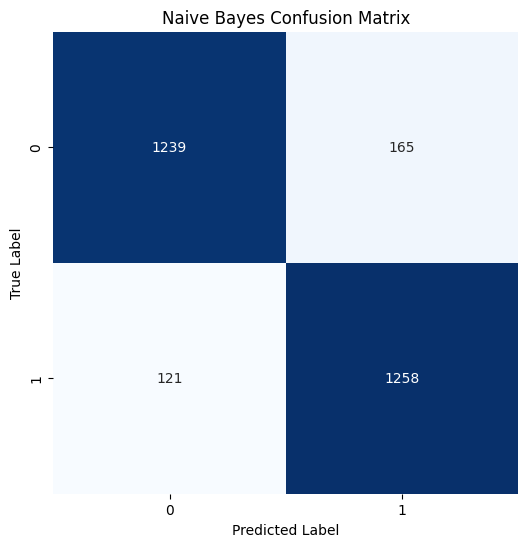

In [ ]:
# Plot confusion matrices
plot_confusion_matrix(svm_confusion_matrix, "SVM Confusion Matrix")
plot_confusion_matrix(rf_confusion_matrix, "Random Forest Confusion Matrix")
plot_confusion_matrix(nb_confusion_matrix, "Naive Bayes Confusion Matrix")
